In [1]:
import numpy as np
import matplotlib.pyplot as plt
#import SIMION_utils as su
import importlib
import pandas as pd

In [2]:
base = 'D:/Simulation Data/SIMION/241119/pressure1/'
base2 = 'D:/Simulation Data/SIMION/241119/pressure2/'
base3 = 'D:/Simulation Data/SIMION/241119/pressure3/'
base4 = 'D:/Simulation Data/SIMION/241119/pressure4/'

files = ['run1', 'run2', 'run3', 'run4', 'run5']
files2 = ['run6', 'run7', 'run8', 'run9', 'run10']
files3 = ['run11', 'run12', 'run13', 'run14', 'run15']

volts = np.array([170, 150, 130, 110, 90])
freq = np.array([5, 4, 3, 2 ,1])*1E+5

ftype = '.csv'

In [3]:
def effiencies(base, files, ftype, plot = False):
    effs = []
    errs = []
    splat_times = []
    indicess = []
    indicess2 = []
    for file in files:
        filename = base+file+ftype
        data = pd.read_csv(filename, names=list('abcdefghij')) 
        da1 = np.array([i for i in data.values if i[0] != 'stopped after max_time' and i[0] != 'ion less then 10 um'])
        da = da1[29::2, 0:5].astype('float')[:, :]
        da2 = da1[30::2, 0:5].astype('float')[:, :]
        splat_times.append(da.transpose()[1])

        i = 0
        j = 0
        indices = []
        indices2 = []
        effs_tmp = []
        for l in range(100):
            da_tmp = da[l*10:(l+1)*10]
            for n, k in enumerate(da_tmp):
                if np.sqrt((k[2]-6.5)**2 + (k[3]-6.5)**2 + k[4]**2)<0.1:
                    i+=1
                    if n != 0:
                        indices.append(n+l*10-1)
                else:
                    j +=1
                    if n != 0:
                        indices2.append(n+l*10-1)
            eff = i/(i+j)
            effs_tmp.append(eff)
        if plot:
            plt.figure()
            plt.plot(np.transpose(da2)[2][indices], np.transpose(da2)[3][indices], 'o')
            plt.plot(np.transpose(da2)[2][indices2], np.transpose(da2)[3][indices2], 'o')
        effs.append(np.mean(effs_tmp))
        errs.append(np.std(effs_tmp)/np.sqrt(10))
        indicess.append(indices)
        indicess2.append(indices2)

    return effs, errs, splat_times, indicess, indicess2

In [4]:
effs1, errs1, st1, i11, i12 = effiencies(base, files, ftype)
effs2, errs2, st2, i21, i22 = effiencies(base, files2, ftype)
effs3, errs3, st3, i31, i32 = effiencies(base2, files, ftype)
effs4, errs4, st4, i41, i42 = effiencies(base2, files2, ftype)
effs5, errs5, st5, i51, i52 = effiencies(base3, files, ftype)
effs6, errs6, st6, i61, i62 = effiencies(base3, files2, ftype)
effs7, errs7, st7, i71, i72 = effiencies(base3, files3, ftype)
effs8, errs8, st8, i81, i82 = effiencies(base4, files, ftype)
effs9, errs9, st9, i91, i92 = effiencies(base4, files2, ftype)

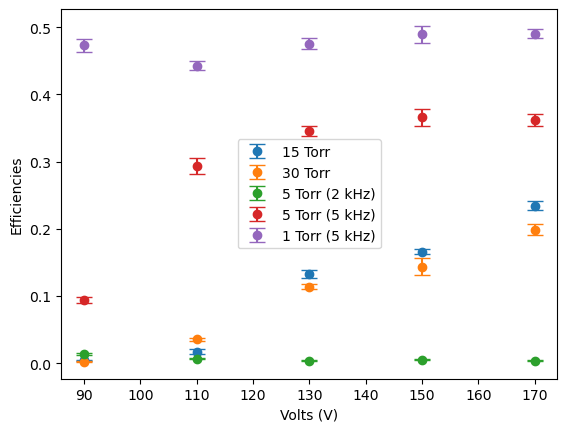

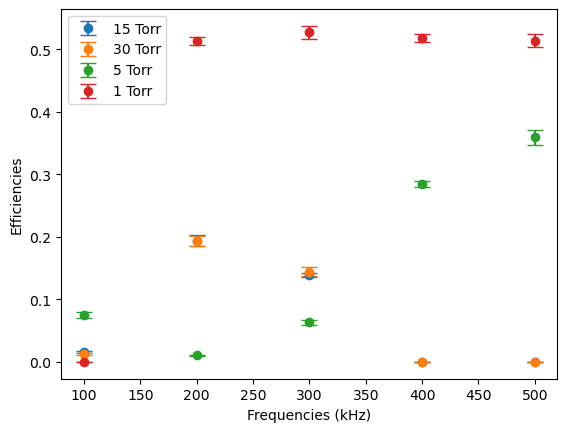

In [5]:
plt.figure()
plt.errorbar(volts, effs1, yerr = errs1, marker = 'o', linestyle = 'None', capsize = 6, label = '15 Torr')
plt.errorbar(volts, effs3, yerr = errs3, marker = 'o', linestyle = 'None', capsize = 6, label = '30 Torr')
plt.errorbar(volts, effs5, yerr = errs5, marker = 'o', linestyle = 'None', capsize = 6, label = '5 Torr (2 kHz)')
plt.errorbar(volts, effs7, yerr = errs7, marker = 'o', linestyle = 'None', capsize = 6, label = '5 Torr (5 kHz)')
plt.errorbar(volts, effs8, yerr = errs8, marker = 'o', linestyle = 'None', capsize = 6, label = '1 Torr (5 kHz)')
plt.ylabel('Efficiencies')
plt.xlabel('Volts (V)')
plt.legend()

plt.figure()
plt.errorbar(freq/1000, effs2, yerr = errs2, marker = 'o', linestyle = 'None', capsize = 6, label = '15 Torr')
plt.errorbar(freq/1000, effs4, yerr = errs4, marker = 'o', linestyle = 'None', capsize = 6, label = '30 Torr')
plt.errorbar(freq/1000, effs6, yerr = errs6, marker = 'o', linestyle = 'None', capsize = 6, label = '5 Torr')
plt.errorbar(freq/1000, effs9, yerr = errs9, marker = 'o', linestyle = 'None', capsize = 6, label = '1 Torr')
plt.ylabel('Efficiencies')
plt.xlabel('Frequencies (kHz)')
plt.legend()

In [ ]:
binss = np.linspace(0, 140000, 30)
hist11, bins11 = np.histogram(st1[0][i11[0]], bins = binss)
hist12, bins12 = np.histogram(st1[0][i12[0]], bins = binss)

hist31, bins31 = np.histogram(st3[0][i31[0]], bins = binss)
hist32, bins32 = np.histogram(st3[0][i32[0]], bins = binss)

hist71, bins71 = np.histogram(st7[0][i71[0]], bins = binss)
hist72, bins72 = np.histogram(st7[0][i72[0]], bins = binss)

hist81, bins81 = np.histogram(st8[0][i81[0]], bins = binss)
hist82, bins82 = np.histogram(st8[0][i82[0]], bins = binss)

#plt.hist(st1[0], bins = binss, alpha = 0.5)

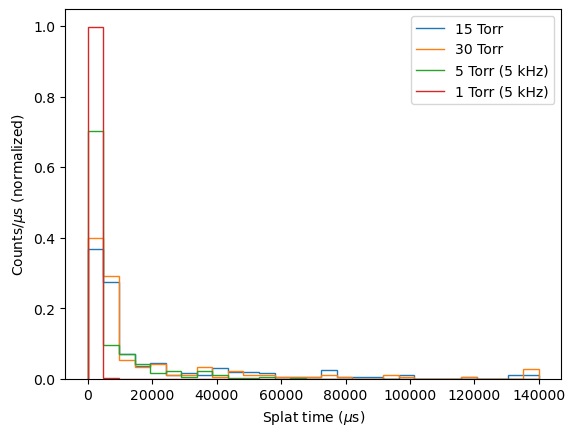

In [11]:
plt.stairs(hist11/sum(hist11), bins11, label = '15 Torr')

plt.stairs(hist31/sum(hist31), bins31, label = '30 Torr')

plt.stairs(hist71/sum(hist71), bins71, label = '5 Torr (5 kHz)')

plt.stairs(hist81/sum(hist81), bins81, label = '1 Torr (5 kHz)')

plt.ylabel("Counts/$\mu$s (normalized)")
plt.xlabel('Splat time ($\mu$s)')
plt.legend()

In [160]:
print(sum(hist11[:3])/sum(hist11))
print(sum(hist31[:3])/sum(hist31))
print(sum(hist71[:3])/sum(hist71))
print(sum(hist81[:3])/sum(hist81))

0.7114427860696517
0.7446808510638298
0.86875
1.0


In [117]:
(0.07/2)**2*0.1*1000*2

0.24500000000000005

In [120]:
0.006**2*0.03*1000*2

0.00216

In [245]:
base5 = 'D:/Simulation Data/SIMION/241121/offset x/'
base6 = 'D:/Simulation Data/SIMION/241121/offset y/'
base7 = 'D:/Simulation Data/SIMION/241121/offset z/'
base8 = 'D:/Simulation Data/SIMION/241121/offset xy/'
base9 = 'D:/Simulation Data/SIMION/241121/offset xyz/'

files5 = ['run1', 'run2', 'run3', 'run4', 'run5', 'run6']
files6 = ['run1', 'run2', 'run3']

off_x = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0])
off_y = np.array([0, 0.4, 0.8, 1.2, 1.6, 2.0])
off_z = np.array([0, 0.4, 0.8, 1.2, 1.6, 2.0])
off_xy = np.array([0, 0.2, 0.4, 0.6, 0.8, 1.0])
off_xyz = np.array([0, 0.1, 0.2, 0.3, 0.4, 0.5])

ftype = '.csv'

In [349]:
def effiencies(base, files, ftype, off_x, off_y, off_z, plot = False):
    effs = []
    errs = []
    splat_times = []
    indicess = []
    indicess2 = []
    for nume, file in enumerate(files):
        filename = base+file+ftype
        data = pd.read_csv(filename, names=list('abcdefghij')) 
        da1 = np.array([i for i in data.values if i[0] != 'stopped after max_time' and i[0] != 'ion less then 20 um' and i[0] != 'ion less then 10 um'])
        da = da1[29::2, 0:5].astype('float')[:, :]
        da2 = da1[30::2, 0:5].astype('float')[:, :]
        splat_times.append(da.transpose()[1])

        i = 0
        j = 0
        indices = []
        indices2 = []
        effs_tmp = []
        for l in range(100):
            da_tmp = da[l*10:(l+1)*10]
            for n, k in enumerate(da_tmp):
                if np.sqrt((k[2]-6.5-off_x[nume])**2 + (k[3]-6.5-off_y[nume])**2 + (k[4]-off_z[nume])**2)<0.1:
                    i+=1
                    if n != 0:
                        indices.append(n+l*10-1)
                else:
                    j +=1
                    if n != 0:
                        indices2.append(n+l*10-1)
            eff = i/(i+j)
            effs_tmp.append(eff)
        if plot:
            plt.figure()
            plt.plot(np.transpose(da2)[2][indices], np.transpose(da2)[3][indices], 'o')
            plt.plot(np.transpose(da2)[2][indices2], np.transpose(da2)[3][indices2], 'o')
        effs.append(np.mean(effs_tmp))
        errs.append(np.std(effs_tmp)/np.sqrt(10))
        indicess.append(indices)
        indicess2.append(indices2)

    return effs, errs, splat_times, indicess, indicess2

In [350]:
effs10, errs10, st10, i101, i102 = effiencies(base5, files5, ftype, off_x, np.zeros(len(off_x)), np.zeros(len(off_x)))
effs11, errs11, st11, i111, i112 = effiencies(base6, files5, ftype, np.zeros(len(off_y)), off_y, np.zeros(len(off_y)))
effs12, errs12, st12, i121, i122 = effiencies(base7, files5, ftype, np.zeros(len(off_z)), np.zeros(len(off_z)), off_z)
effs13, errs13, st13, i131, i132 = effiencies(base8, files5, ftype, off_xy, off_xy, np.zeros(len(off_xy)))
effs14, errs14, st14, i141, i142 = effiencies(base9, files5, ftype, off_xyz, off_xyz, off_xyz)

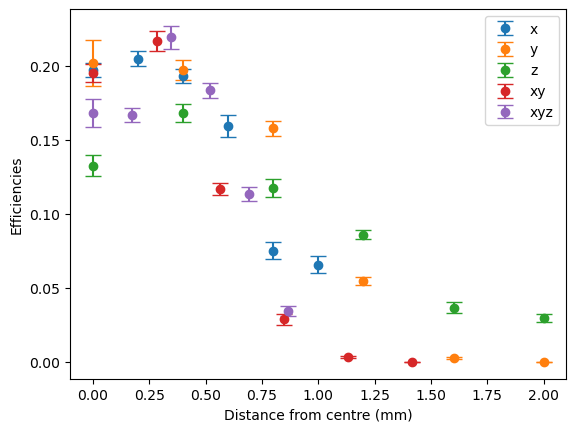

In [351]:
plt.figure()
plt.errorbar(off_x, effs10, yerr = errs10, marker = 'o', linestyle = 'None', capsize = 6, label = 'x')
plt.errorbar(off_y, effs11, yerr = errs11, marker = 'o', linestyle = 'None', capsize = 6, label = 'y')
plt.errorbar(off_z, effs12, yerr = errs12, marker = 'o', linestyle = 'None', capsize = 6, label = 'z')
plt.errorbar(off_xy*np.sqrt(2), effs13, yerr = errs13, marker = 'o', linestyle = 'None', capsize = 6, label = 'xy')
plt.errorbar(off_xyz*np.sqrt(3), effs14, yerr = errs14, marker = 'o', linestyle = 'None', capsize = 6, label = 'xyz')
plt.ylabel('Efficiencies')
plt.xlabel('Distance from centre (mm)')
plt.legend()